In [51]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [53]:
dataFrame= pd.read_csv("/gdrive/MyDrive/Calisma_ortami/Belge.csv")

# LabelEncoder Kategorik Veriyi Numerik Veriye Dönüştürme

`df.apply(preprocessing.LabelEncoder().fit_transform)`




In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
labelEncoding= LabelEncoder()

In [56]:
windy = dataFrame.iloc[:,3:4].values

In [57]:
dataFrame["windy"] =labelEncoding.fit_transform(windy)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
play= dataFrame.iloc[:,-1].values

In [59]:
dataFrame["play"]= labelEncoding.fit_transform(play)

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
oneHotEncoding= OneHotEncoder()

In [62]:
outlook= dataFrame.iloc[:, 0:1].values

In [63]:
outlook= oneHotEncoding.fit_transform(outlook).toarray()

# OneHotEncoder Kategorik Veriyi Numerik Veriye Dönüştürme

`pd.get_dummies(DF["-"], prefix="-")` bu şekilde ifade edilebilir.





In [64]:
dataFrame = pd.concat([dataFrame, pd.get_dummies(dataFrame["outlook"], prefix="outlook")], axis=1).drop("outlook", axis=1)

In [65]:
dataFrame

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
0,85,85,0,0,False,False,True
1,80,90,1,0,False,False,True
2,83,86,0,1,True,False,False
3,70,96,0,1,False,True,False
4,68,80,0,1,False,True,False
5,65,70,1,0,False,True,False
6,64,65,1,1,True,False,False
7,72,95,0,0,False,False,True
8,69,70,0,1,False,False,True
9,75,80,0,1,False,True,False


<Axes: >

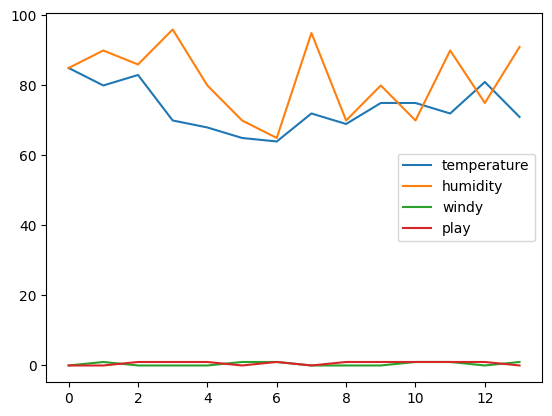

In [66]:
dataFrame.plot()

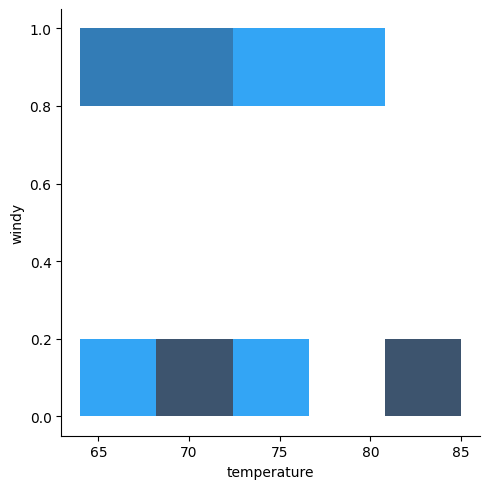

In [67]:
sbn.displot(x=  "temperature", y="windy", data=dataFrame)

In [68]:
dataFrame.isnull()

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [69]:
 dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   temperature       14 non-null     int64
 1   humidity          14 non-null     int64
 2   windy             14 non-null     int64
 3   play              14 non-null     int64
 4   outlook_overcast  14 non-null     bool 
 5   outlook_rainy     14 non-null     bool 
 6   outlook_sunny     14 non-null     bool 
dtypes: bool(3), int64(4)
memory usage: 622.0 bytes


In [70]:
dataFrame.corr()

,temperature,humidity,windy,play,outlook_overcast,outlook_rainy,outlook_sunny
temperature,1.000000,0.315082,-0.328866,-0.121064,0.142675,-0.443901,0.309386
humidity,0.315082,1.000000,-0.201805,-0.342717,-0.168649,0.132145,0.026859
windy,-0.328866,-0.201805,1.000000,-0.258199,0.091287,-0.043033,-0.043033
play,-0.121064,-0.342717,-0.258199,1.000000,0.471405,-0.066667,-0.377778
outlook_overcast,0.142675,-0.168649,0.091287,0.471405,1.000000,-0.471405,-0.471405
outlook_rainy,-0.443901,0.132145,-0.043033,-0.066667,-0.471405,1.000000,-0.555556
outlook_sunny,0.309386,0.026859,-0.043033,-0.377778,-0.471405,-0.555556,1.000000


In [71]:
dataFrame.mean()

,0
temperature,73.571429
humidity,81.642857
windy,0.428571
play,0.642857
outlook_overcast,0.285714
outlook_rainy,0.357143
outlook_sunny,0.357143


In [72]:
x= dataFrame.drop("play", axis=1).values
y= dataFrame["play"].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression()

In [77]:
regression= regression.fit(x_train, y_train)

In [78]:
y_test_predict= regression.predict(x_test)

In [79]:
print(y_test_predict)

[0.74233631 0.75371988 0.78998557 0.27181229 0.78572451]


In [80]:
 print(y_test)

[1 1 1 1 1]


# Bacward Elemination

In [81]:
import statsmodels.api as sm

In [82]:
x=np.append(arr= np.ones((14,1)).astype(int), values=x, axis=1)
x

array([[1, 85, 85, 0, False, False, True],
       [1, 80, 90, 1, False, False, True],
       [1, 83, 86, 0, True, False, False],
       [1, 70, 96, 0, False, True, False],
       [1, 68, 80, 0, False, True, False],
       [1, 65, 70, 1, False, True, False],
       [1, 64, 65, 1, True, False, False],
       [1, 72, 95, 0, False, False, True],
       [1, 69, 70, 0, False, False, True],
       [1, 75, 80, 0, False, True, False],
       [1, 75, 70, 1, False, False, True],
       [1, 72, 90, 1, True, False, False],
       [1, 81, 75, 0, True, False, False],
       [1, 71, 91, 1, False, True, False]], dtype=object)

In [83]:
X= x[:, [0,1,2,3,4,5]]

In [86]:
# Convert all columns of x to numeric type if possible.
# If a column cannot be converted, it will be filled with NaNs.
# Replace 'coerce' with 'raise' to see errors if any columns cannot be converted.

# Instead of errors='coerce', use try-except block for older NumPy versions:
try:
    x = x.astype(float, errors='coerce')
except TypeError:
    x = x.astype(float)  # For older NumPy versions
    # Handle invalid values manually (if needed)

# You can drop the rows with NaNs
x = x[~np.isnan(x).any(axis=1)]

# Re-create X with the correct dimensions after potentially dropping rows.
X = x[:, [0, 1, 2, 3, 4, 5]]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1.493
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.292
Time:                        11:14:21   Log-Likelihood:                -4.9501
No. Observations:                  14   AIC:                             21.90
Df Residuals:                       8   BIC:                             25.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8194      1.878      1.501      0.1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [87]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1.493
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.292
Time:                        11:14:36   Log-Likelihood:                -4.9501
No. Observations:                  14   AIC:                             21.90
Df Residuals:                       8   BIC:                             25.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8194      1.878      1.501      0.1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [88]:
   X= x[:, [0,1,2,3,5]]

In [89]:
model =sm.OLS(y,X).fit()

In [90]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.7637
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.575
Time:                        11:14:46   Log-Likelihood:                -7.5192
No. Observations:                  14   AIC:                             25.04
Df Residuals:                       9   BIC:                             28.23
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3262      2.106      1.580      0.1

In [91]:
X= x[:, [0,1,4,5]]

In [92]:
model= sm.OLS(y,X).fit()

In [93]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.229
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.350
Time:                        11:14:53   Log-Likelihood:                -7.3683
No. Observations:                  14   AIC:                             22.74
Df Residuals:                      10   BIC:                             25.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2172      1.759      0.692      0.5

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [97]:
!git add LinearRegession_havaDurumuTahmin.ipynb
!git commit -m "Kod güncellendi: Yeni düzenlemeler yapıldı"


On branch main
nothing to commit, working tree clean


In [ ]:
import shutil
import os

source = "/content/drive/MyDrive/Calisma_ortami"
destination = "/content/LinearRegession_havaDurumuTahmini"

# Sadece ipynb, csv, xlsx, py uzantılı dosyaları kopyala
uzantilar = [".ipynb", ".csv", ".xlsx", ".py"]

for filename in os.listdir(source):
    if any(filename.endswith(ext) for ext in uzantilar):
        shutil.copy(os.path.join(source, filename),
                    os.path.join(destination, filename))


In [104]:
!ls /content/drive/MyDrive/Calisma_ortami


 aprioriAlgorithm.ipynb			  merc.xlsx
 apyori.py				  MNIST_YSA.ipynb
 aylaragoresatislar.csv			  modelBasarisi.ipynb
 Belge.csv				 'PCA&LDA_Boyut_Indirgeme.ipynb'
 Cesitli_Tahminleme_Yontemleri.ipynb	  rakamtanima_cnn.py
 Churn_Modelling.csv			  sepet.csv
 ClusterAlgorithms.ipynb		  sepet.xlsx
 Colab_Calisma_Ortami.ipynb		  TensorflowArabaAnalizi.ipynb
 eksik_veriler.csv			  TensorflowSiniflandira.ipynb
 imputerOrnegi.ipynb			  TEZ-KESİNTİ
 Iris_Veri_Kumesi.ipynb			  veri.csv
 Iris.xls				  veri_iyilestirme.ipynb
 kesinti.ipynb				  veriler.csv
 LinearRegession_havaDurumuTahmin.ipynb   wine.csv
 LogisticRegressionSiniflama.ipynb	  yeni_maaslar.csv
 maliciousornot.xlsx			  YSA.ipynb
